In [48]:
import numpy as np
import pandas as pd
import seaborn as sns

In [49]:
seacnn_fixed_v2 = pd.read_csv("../results/output_places_US_knn_seacnn_mem_new.csv")
seacnn_fixed_v2 = seacnn_fixed_v2[~seacnn_fixed_v2['name'].isin(['no_clean', 'vc_knn'])]


name_map = {
    'vc': "VC (Expiration)",
    'vc_knn_fixed': "VC (Expiration + KNN boundry)"
}

seacnn_fixed_v2['name'] = seacnn_fixed_v2['name'].apply(lambda x: name_map[x])

res = pd.concat([
    seacnn_fixed_v2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])

res

,creation_time,search_time,num_queries,name
4,145585531,4091322206,100000,VC (Expiration)
5,438031833,20294146530,500000,VC (Expiration)
6,774348744,41352705571,1000000,VC (Expiration)
7,2247296200,131104049933,2500000,VC (Expiration)
12,167845595,4492421995,100000,VC (Expiration + KNN boundry)
13,471066828,21479783086,500000,VC (Expiration + KNN boundry)
14,1225058632,42473628656,1000000,VC (Expiration + KNN boundry)
15,2307218112,126858493426,2500000,VC (Expiration + KNN boundry)


In [50]:
# def expName(x):
#     if x == "places":
#         return "0% KNN Queries"
#     elif x == "places_knn_05":
#         return "5% KNN Queries"
#     elif x == "places_knn_10":
#         return "10% KNN Queries"

<AxesSubplot:xlabel='No. of queries', ylabel='Index creation time (sec)'>

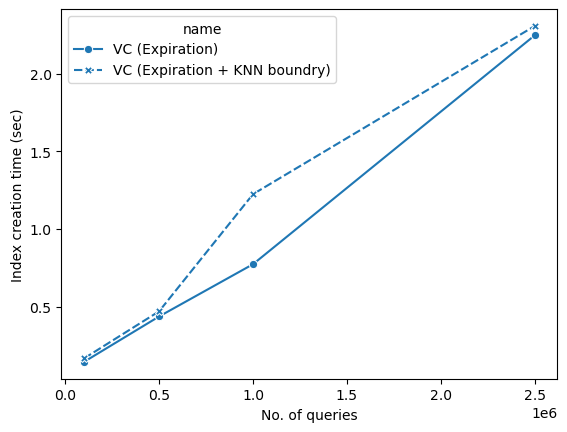

In [51]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [52]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
5,438031833,40588.293060,500000,VC (Expiration)
13,471066828,42959.566172,500000,VC (Expiration + KNN boundry)


In [53]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
7,2247296200,131104049933,2500000,VC (Expiration)
15,2307218112,126858493426,2500000,VC (Expiration + KNN boundry)


<AxesSubplot:xlabel='No. of queries', ylabel='Query Matching Time (nano sec)'>

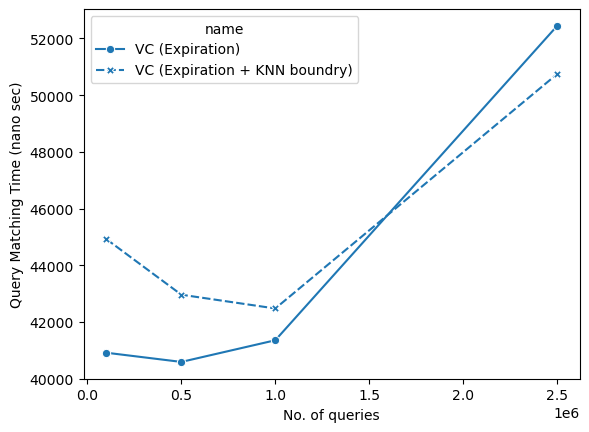

In [54]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (nano sec)'] = search_res['search_time'].apply(lambda x: x) / search_res['num_queries']
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (nano sec)', style='name', data=search_res, errorbar=None, markers=True)

In [55]:
# Optimization
# - Custom iterator
# - Circle bound calculation